In [8]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB, ComplementNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import (
    StandardScaler, MinMaxScaler, RobustScaler, PowerTransformer, KBinsDiscretizer, FunctionTransformer
)
import warnings
import scorecardpy as sc

In [16]:
dataset = pd.read_csv('Customer_Churn_Modified.csv')
# Define feature columns (X) and target column (y)
X = dataset.iloc[:, :-1].values  
y = dataset.iloc[:, -1].values

# Split the dataset into training and testing sets
def custom_train_test_split(X, y, test_size=0.2, stratify=None, random_state=None):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, stratify=stratify, random_state=random_state)
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = custom_train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Function to print class proportions
def print_proportions(y):
    unique, counts = np.unique(y, return_counts=True)
    total = len(y)
    for val, count in zip(unique, counts):
        print(f"Class {val}: {count} ({count/total*100:.1f}%)")

print("\nTraining set proportions:")
print_proportions(y_train)
print("\nTest set proportions:")
print_proportions(y_test)


Training set proportions:
Class 0: 2124 (84.3%)
Class 1: 396 (15.7%)

Test set proportions:
Class 0: 531 (84.3%)
Class 1: 99 (15.7%)



Baseline Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.69      0.81       531
           1       0.35      0.90      0.50        99

    accuracy                           0.72       630
   macro avg       0.66      0.79      0.65       630
weighted avg       0.88      0.72      0.76       630



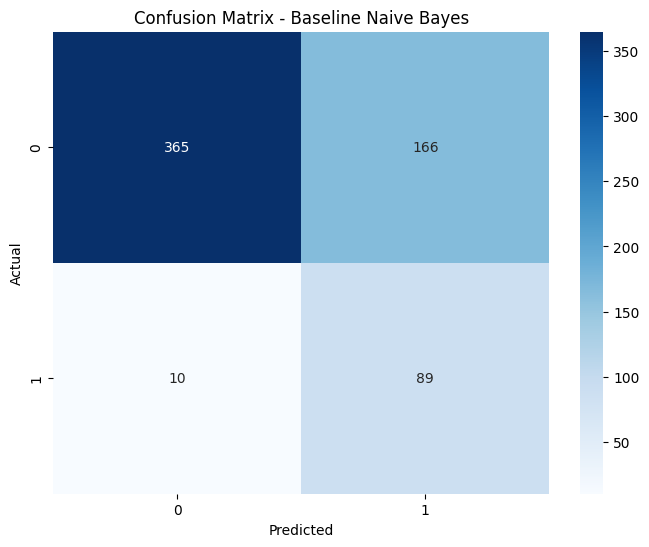


Random Oversampling Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.65      0.78       531
           1       0.32      0.90      0.48        99

    accuracy                           0.69       630
   macro avg       0.65      0.77      0.63       630
weighted avg       0.87      0.69      0.73       630



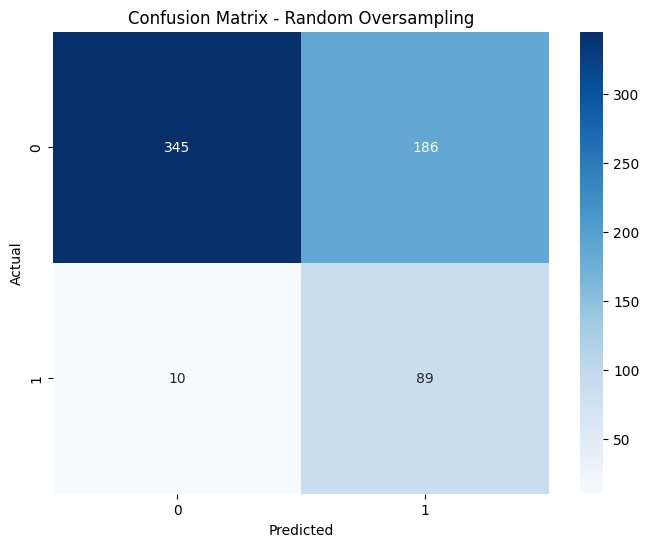


SMOTE Oversampling Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.66      0.79       531
           1       0.33      0.90      0.49        99

    accuracy                           0.70       630
   macro avg       0.65      0.78      0.64       630
weighted avg       0.87      0.70      0.74       630



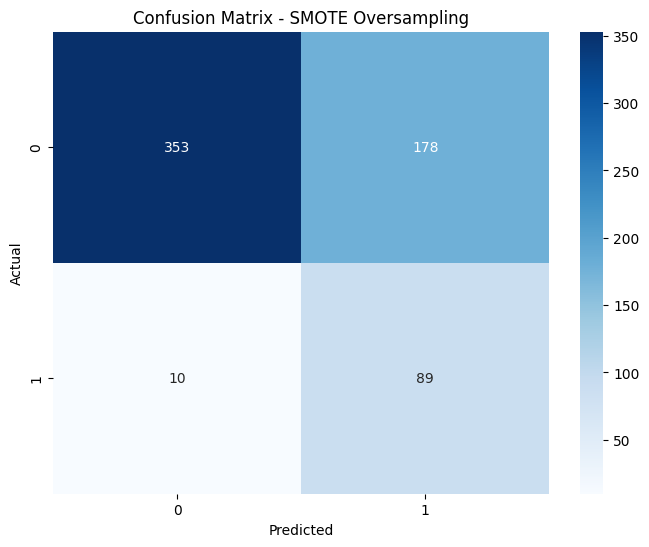


Random Undersampling Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.65      0.78       531
           1       0.32      0.90      0.48        99

    accuracy                           0.69       630
   macro avg       0.65      0.77      0.63       630
weighted avg       0.87      0.69      0.73       630



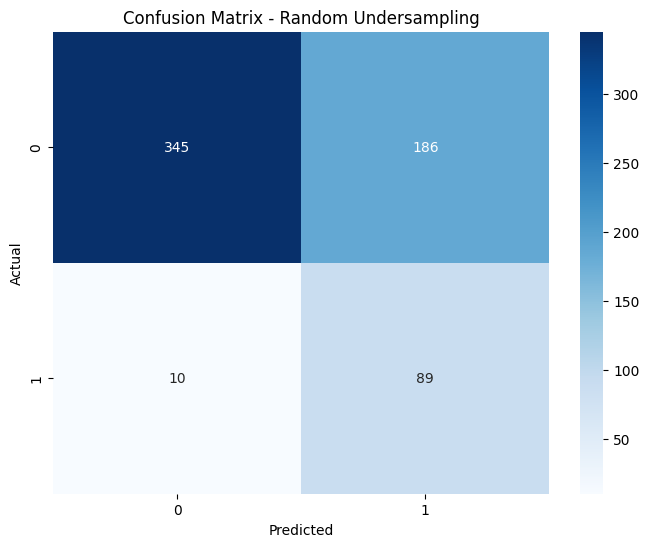


SMOTE + ENN Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.64      0.77       531
           1       0.32      0.90      0.47        99

    accuracy                           0.68       630
   macro avg       0.64      0.77      0.62       630
weighted avg       0.87      0.68      0.72       630



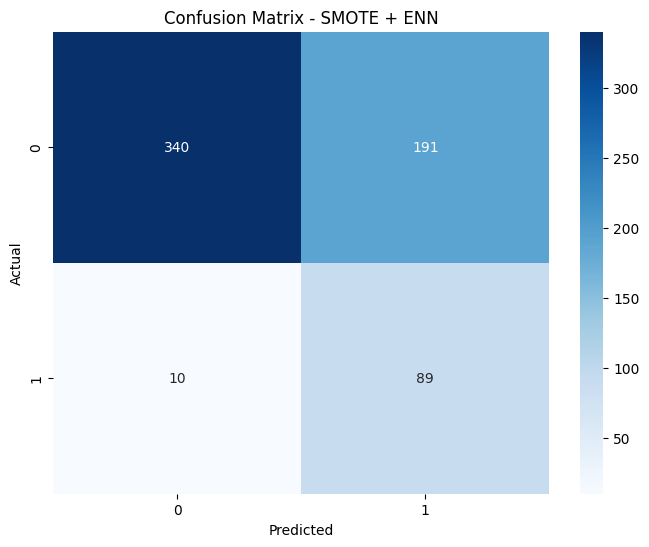


Summary of Results:
            Description  Accuracy  Precision    Recall  F1 Score
0  Baseline Naive Bayes  0.720635   0.661176  0.793186  0.654282
1   Random Oversampling  0.688889   0.647734  0.774354  0.627358
2    SMOTE Oversampling  0.701587   0.652893  0.781887  0.638024
3  Random Undersampling  0.688889   0.647734  0.774354  0.627358
4           SMOTE + ENN  0.680952   0.644643  0.769646  0.620754


In [7]:
def evaluate_naive_bayes_model(X_train, y_train, X_test, y_test, description):
    model = GaussianNB()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    
    # Print metrics and confusion matrix
    print(f"\n{description} Classification Report:")
    print(classification_report(y_test, y_pred))
    
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_train), yticklabels=np.unique(y_train))
    plt.title(f"Confusion Matrix - {description}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    return {'Description': description, 'Accuracy': acc, 'Precision': prec, 'Recall': recall, 'F1 Score': f1}

# List to store results
results = []

# 1. Baseline Naive Bayes without any handling
results.append(evaluate_naive_bayes_model(X_train, y_train, X_test, y_test, "Baseline Naive Bayes"))

# 2. Random Oversampling
random_oversampler = RandomOverSampler(random_state=42)
X_train_over, y_train_over = random_oversampler.fit_resample(X_train, y_train)
results.append(evaluate_naive_bayes_model(X_train_over, y_train_over, X_test, y_test, "Random Oversampling"))

# 3. SMOTE Oversampling
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
results.append(evaluate_naive_bayes_model(X_train_smote, y_train_smote, X_test, y_test, "SMOTE Oversampling"))

# 4. Random Undersampling
undersampler = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = undersampler.fit_resample(X_train, y_train)
results.append(evaluate_naive_bayes_model(X_train_under, y_train_under, X_test, y_test, "Random Undersampling"))

# 5. Combination of SMOTE and ENN (SMOTEENN)
smote_enn = SMOTEENN(random_state=42)
X_train_smoteenn, y_train_smoteenn = smote_enn.fit_resample(X_train, y_train)
results.append(evaluate_naive_bayes_model(X_train_smoteenn, y_train_smoteenn, X_test, y_test, "SMOTE + ENN"))

# Summarize results in a table
results_df = pd.DataFrame(results)
print("\nSummary of Results:")
print(results_df)



GaussianNB with No Resampling: Accuracy = 0.7206349206349206
              precision    recall  f1-score   support

           0       0.97      0.69      0.81       531
           1       0.35      0.90      0.50        99

    accuracy                           0.72       630
   macro avg       0.66      0.79      0.65       630
weighted avg       0.88      0.72      0.76       630



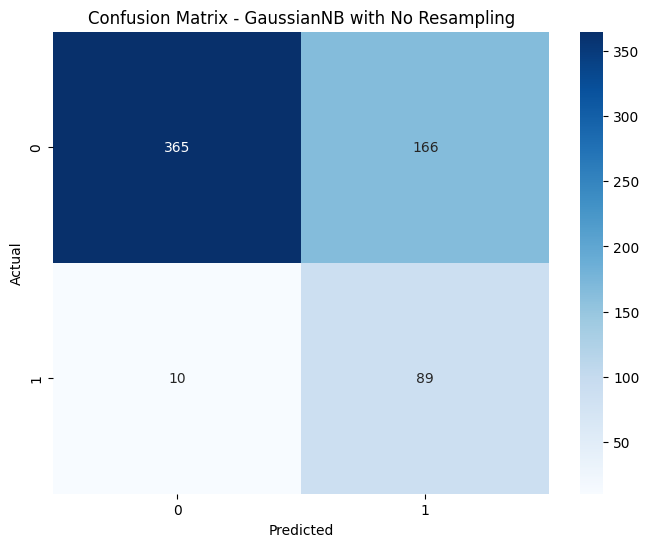


GaussianNB with SMOTE: Accuracy = 0.7015873015873015
              precision    recall  f1-score   support

           0       0.97      0.66      0.79       531
           1       0.33      0.90      0.49        99

    accuracy                           0.70       630
   macro avg       0.65      0.78      0.64       630
weighted avg       0.87      0.70      0.74       630



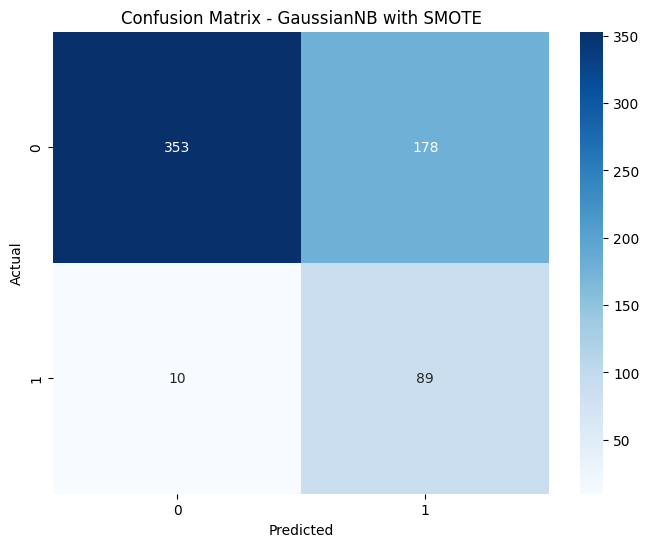


GaussianNB with Random Oversampling: Accuracy = 0.6888888888888889
              precision    recall  f1-score   support

           0       0.97      0.65      0.78       531
           1       0.32      0.90      0.48        99

    accuracy                           0.69       630
   macro avg       0.65      0.77      0.63       630
weighted avg       0.87      0.69      0.73       630



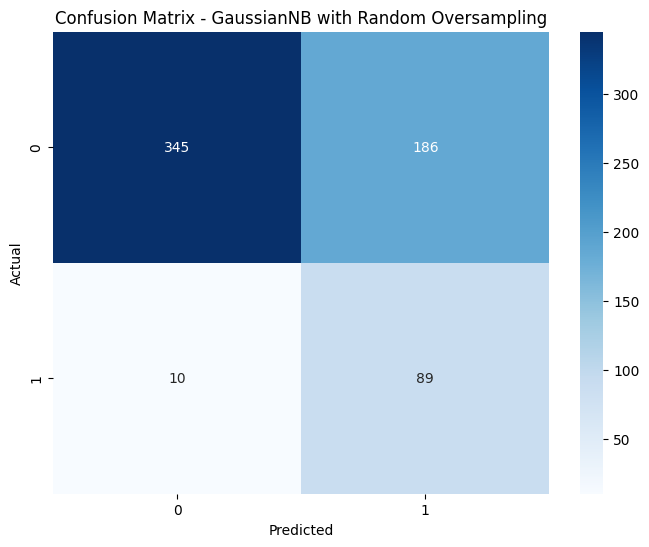


GaussianNB with Random Undersampling: Accuracy = 0.6888888888888889
              precision    recall  f1-score   support

           0       0.97      0.65      0.78       531
           1       0.32      0.90      0.48        99

    accuracy                           0.69       630
   macro avg       0.65      0.77      0.63       630
weighted avg       0.87      0.69      0.73       630



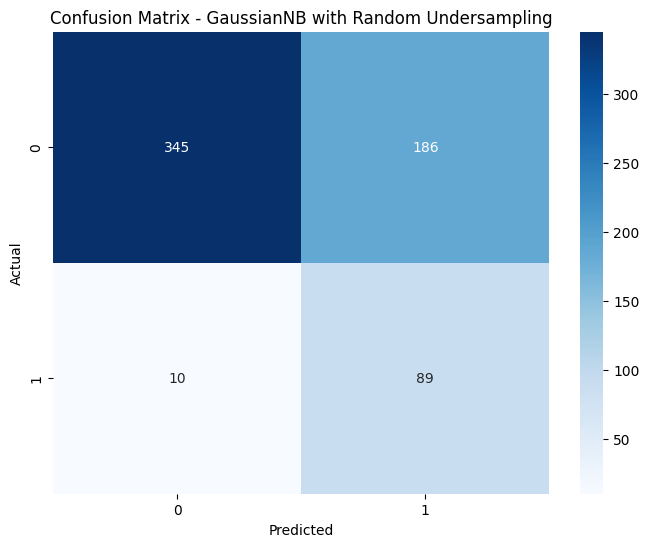


GaussianNB with SMOTEENN: Accuracy = 0.680952380952381
              precision    recall  f1-score   support

           0       0.97      0.64      0.77       531
           1       0.32      0.90      0.47        99

    accuracy                           0.68       630
   macro avg       0.64      0.77      0.62       630
weighted avg       0.87      0.68      0.72       630



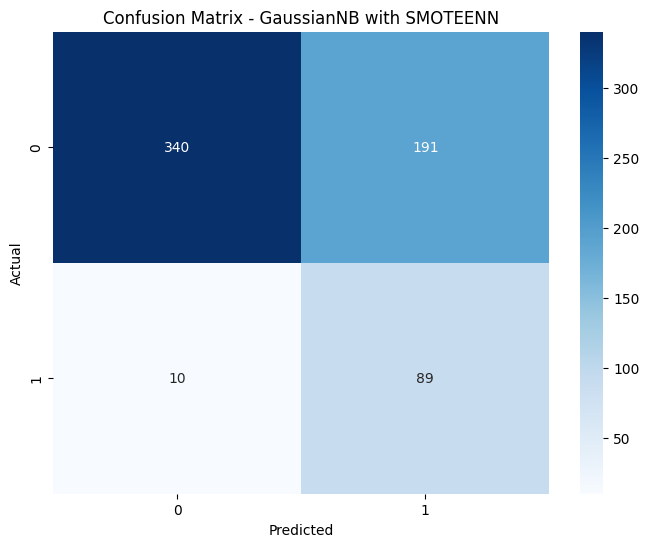


MultinomialNB with No Resampling: Accuracy = 0.5777777777777777
              precision    recall  f1-score   support

           0       0.96      0.52      0.67       531
           1       0.26      0.89      0.40        99

    accuracy                           0.58       630
   macro avg       0.61      0.70      0.54       630
weighted avg       0.85      0.58      0.63       630



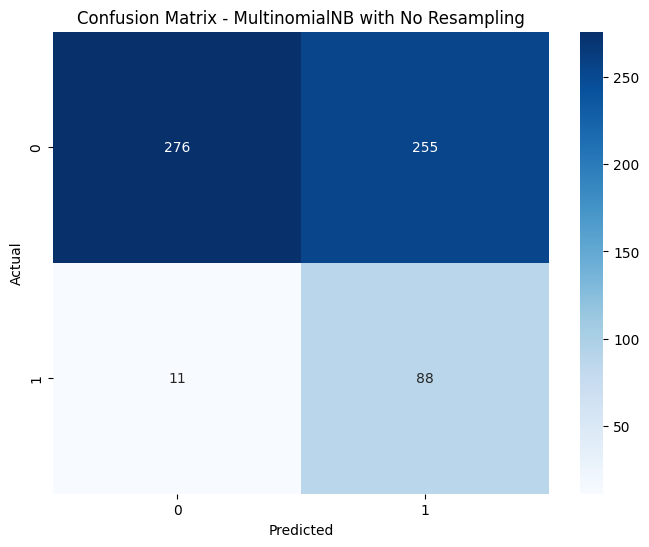


MultinomialNB with SMOTE: Accuracy = 0.573015873015873
              precision    recall  f1-score   support

           0       0.96      0.51      0.67       531
           1       0.25      0.89      0.40        99

    accuracy                           0.57       630
   macro avg       0.61      0.70      0.53       630
weighted avg       0.85      0.57      0.63       630



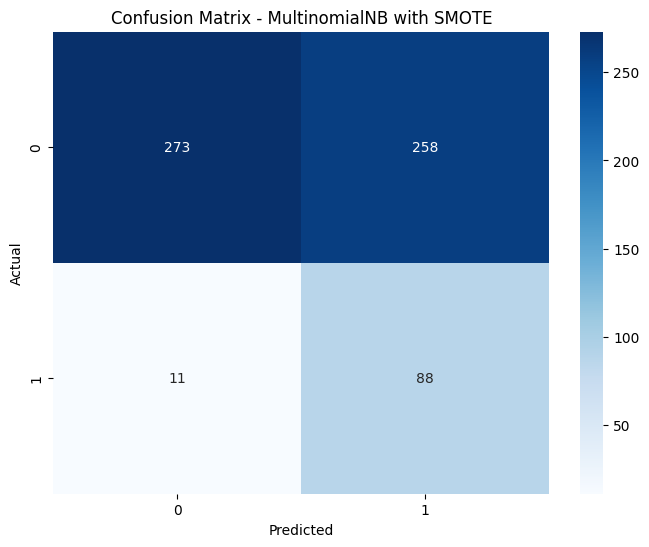


MultinomialNB with Random Oversampling: Accuracy = 0.5682539682539682
              precision    recall  f1-score   support

           0       0.96      0.51      0.67       531
           1       0.25      0.89      0.39        99

    accuracy                           0.57       630
   macro avg       0.61      0.70      0.53       630
weighted avg       0.85      0.57      0.62       630



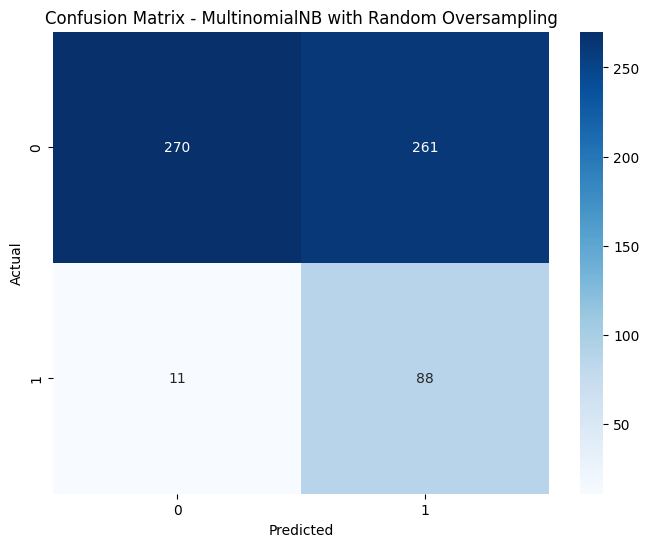


MultinomialNB with Random Undersampling: Accuracy = 0.5825396825396826
              precision    recall  f1-score   support

           0       0.96      0.53      0.68       531
           1       0.26      0.89      0.40        99

    accuracy                           0.58       630
   macro avg       0.61      0.71      0.54       630
weighted avg       0.85      0.58      0.64       630



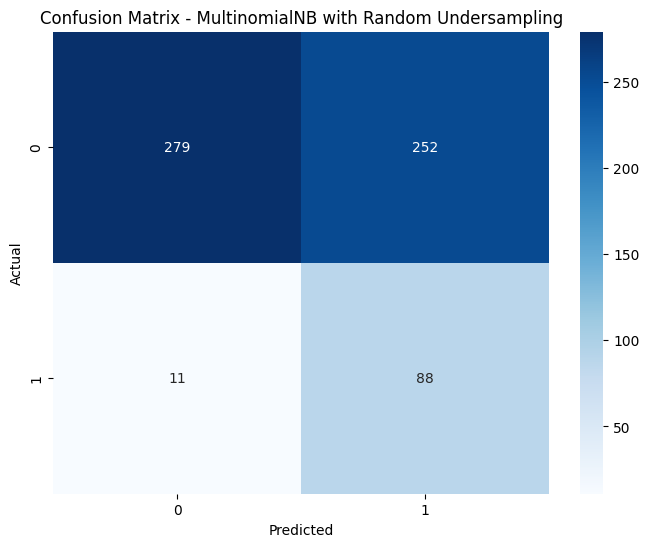


MultinomialNB with SMOTEENN: Accuracy = 0.5523809523809524
              precision    recall  f1-score   support

           0       0.96      0.49      0.65       531
           1       0.25      0.89      0.38        99

    accuracy                           0.55       630
   macro avg       0.60      0.69      0.52       630
weighted avg       0.85      0.55      0.61       630



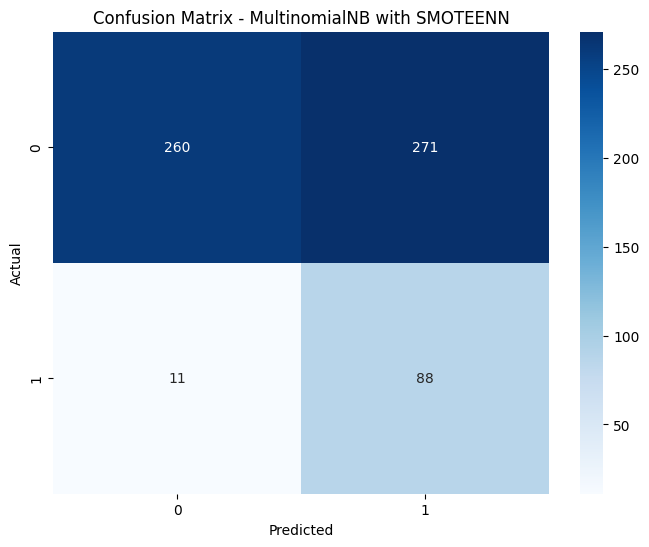


BernoulliNB with No Resampling: Accuracy = 0.9
              precision    recall  f1-score   support

           0       0.90      0.99      0.94       531
           1       0.91      0.40      0.56        99

    accuracy                           0.90       630
   macro avg       0.90      0.70      0.75       630
weighted avg       0.90      0.90      0.88       630



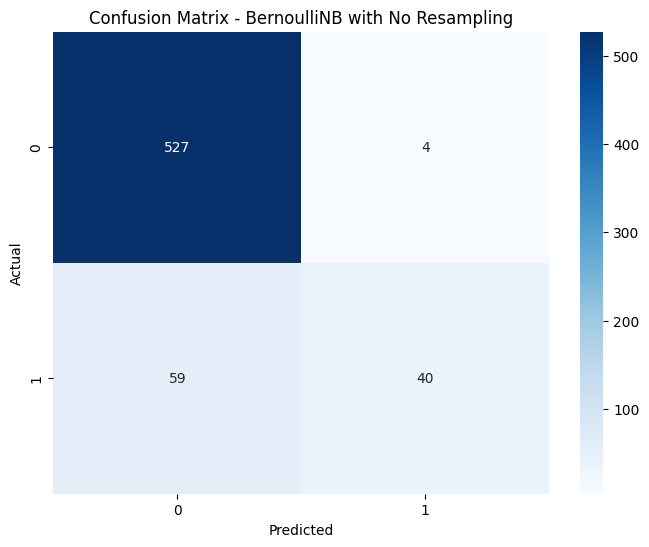


BernoulliNB with SMOTE: Accuracy = 0.9
              precision    recall  f1-score   support

           0       0.90      0.99      0.94       531
           1       0.91      0.40      0.56        99

    accuracy                           0.90       630
   macro avg       0.90      0.70      0.75       630
weighted avg       0.90      0.90      0.88       630



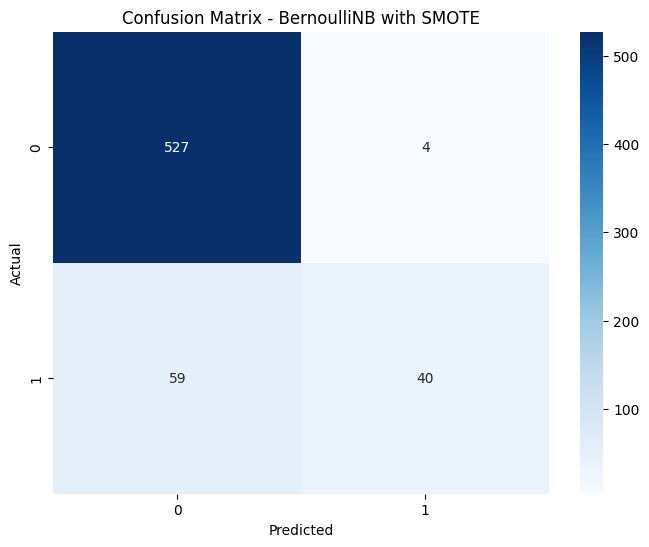


BernoulliNB with Random Oversampling: Accuracy = 0.9
              precision    recall  f1-score   support

           0       0.90      0.99      0.94       531
           1       0.91      0.40      0.56        99

    accuracy                           0.90       630
   macro avg       0.90      0.70      0.75       630
weighted avg       0.90      0.90      0.88       630



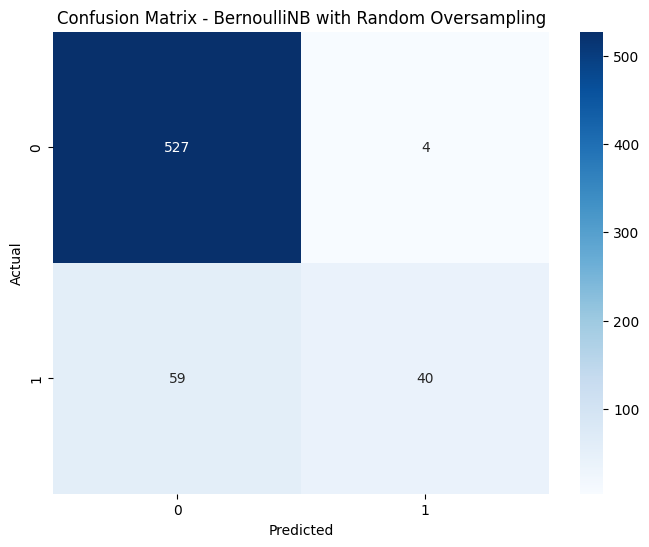


BernoulliNB with Random Undersampling: Accuracy = 0.8523809523809524
              precision    recall  f1-score   support

           0       0.90      0.93      0.91       531
           1       0.54      0.45      0.49        99

    accuracy                           0.85       630
   macro avg       0.72      0.69      0.70       630
weighted avg       0.84      0.85      0.85       630



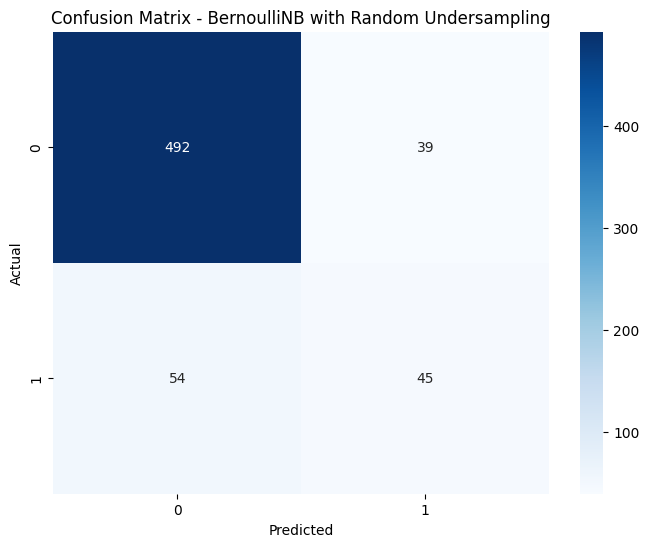


BernoulliNB with SMOTEENN: Accuracy = 0.9
              precision    recall  f1-score   support

           0       0.90      0.99      0.94       531
           1       0.91      0.40      0.56        99

    accuracy                           0.90       630
   macro avg       0.90      0.70      0.75       630
weighted avg       0.90      0.90      0.88       630



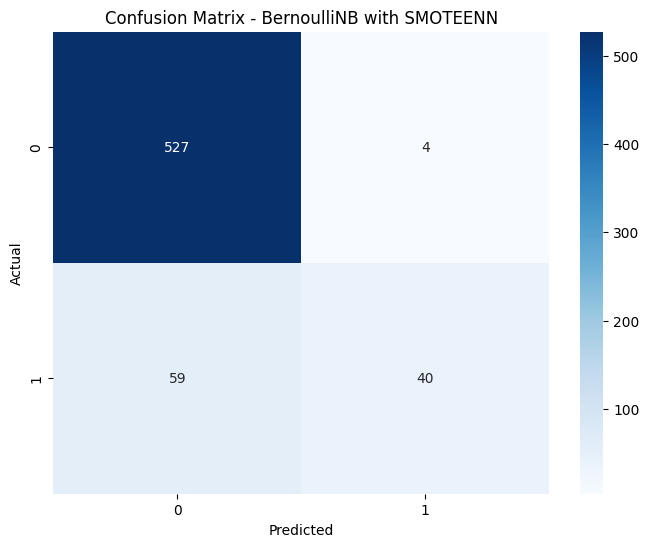


ComplementNB with No Resampling: Accuracy = 0.573015873015873
              precision    recall  f1-score   support

           0       0.96      0.51      0.67       531
           1       0.25      0.89      0.40        99

    accuracy                           0.57       630
   macro avg       0.61      0.70      0.53       630
weighted avg       0.85      0.57      0.63       630



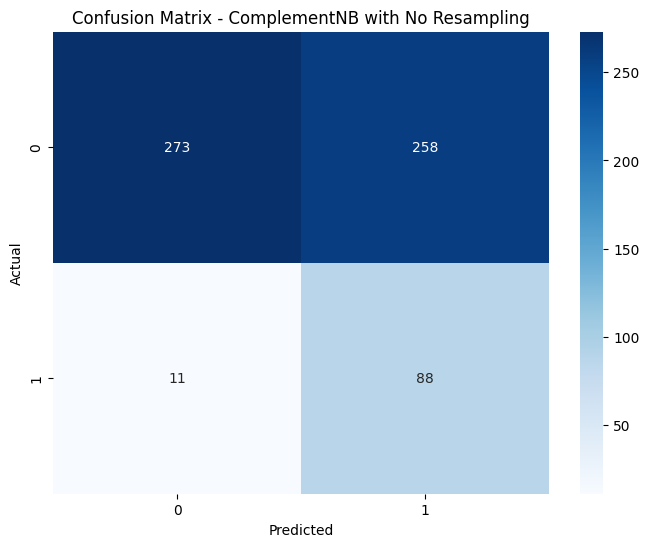


ComplementNB with SMOTE: Accuracy = 0.573015873015873
              precision    recall  f1-score   support

           0       0.96      0.51      0.67       531
           1       0.25      0.89      0.40        99

    accuracy                           0.57       630
   macro avg       0.61      0.70      0.53       630
weighted avg       0.85      0.57      0.63       630



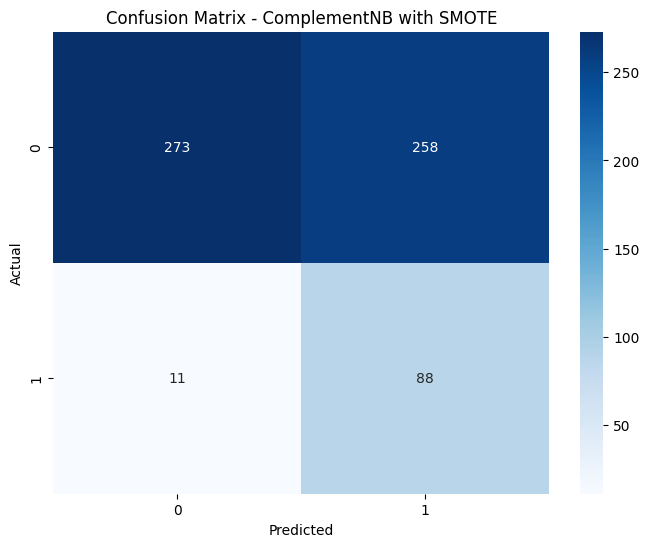


ComplementNB with Random Oversampling: Accuracy = 0.5682539682539682
              precision    recall  f1-score   support

           0       0.96      0.51      0.67       531
           1       0.25      0.89      0.39        99

    accuracy                           0.57       630
   macro avg       0.61      0.70      0.53       630
weighted avg       0.85      0.57      0.62       630



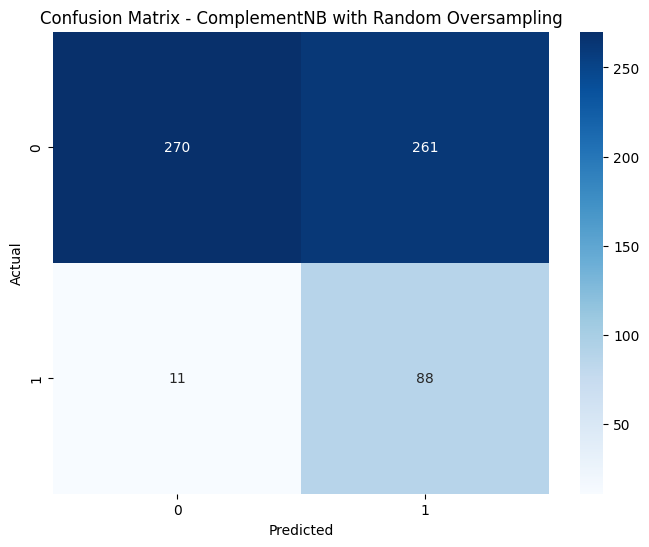


ComplementNB with Random Undersampling: Accuracy = 0.5825396825396826
              precision    recall  f1-score   support

           0       0.96      0.53      0.68       531
           1       0.26      0.89      0.40        99

    accuracy                           0.58       630
   macro avg       0.61      0.71      0.54       630
weighted avg       0.85      0.58      0.64       630



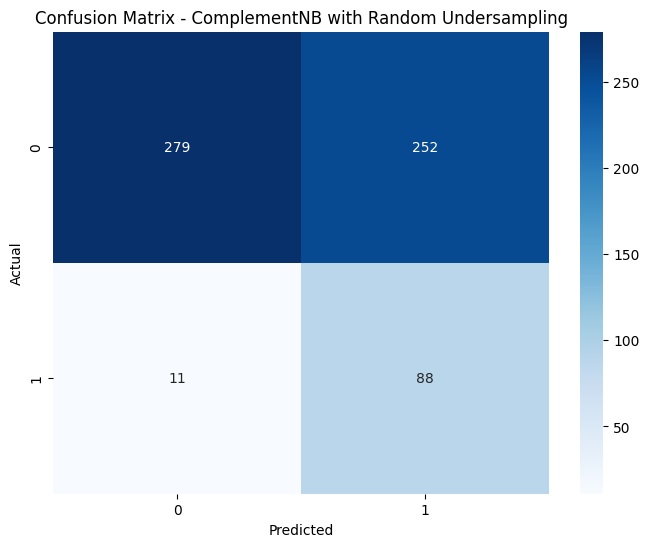


ComplementNB with SMOTEENN: Accuracy = 0.553968253968254
              precision    recall  f1-score   support

           0       0.96      0.49      0.65       531
           1       0.25      0.89      0.39        99

    accuracy                           0.55       630
   macro avg       0.60      0.69      0.52       630
weighted avg       0.85      0.55      0.61       630



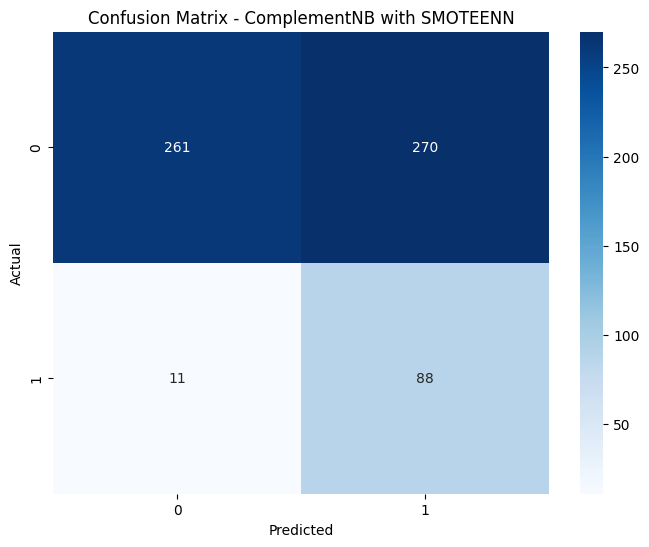


Summary of Naive Bayes Evaluation:
            Model            Resampling  Accuracy
0      GaussianNB         No Resampling  0.720635
1      GaussianNB                 SMOTE  0.701587
2      GaussianNB   Random Oversampling  0.688889
3      GaussianNB  Random Undersampling  0.688889
4      GaussianNB              SMOTEENN  0.680952
5   MultinomialNB         No Resampling  0.577778
6   MultinomialNB                 SMOTE  0.573016
7   MultinomialNB   Random Oversampling  0.568254
8   MultinomialNB  Random Undersampling  0.582540
9   MultinomialNB              SMOTEENN  0.552381
10    BernoulliNB         No Resampling  0.900000
11    BernoulliNB                 SMOTE  0.900000
12    BernoulliNB   Random Oversampling  0.900000
13    BernoulliNB  Random Undersampling  0.852381
14    BernoulliNB              SMOTEENN  0.900000
15   ComplementNB         No Resampling  0.573016
16   ComplementNB                 SMOTE  0.573016
17   ComplementNB   Random Oversampling  0.568254
18   Complemen

In [11]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB, ComplementNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.pipeline import make_pipeline as make_imb_pipeline

# Define Naive Bayes models
models = {
    'GaussianNB': GaussianNB(),
    'MultinomialNB': MultinomialNB(),
    'BernoulliNB': BernoulliNB(),
    'ComplementNB': ComplementNB()
}

# Resampling methods
resampling_methods = {
    'No Resampling': None,
    'SMOTE': SMOTE(random_state=42),
    'Random Oversampling': RandomOverSampler(random_state=42),
    'Random Undersampling': RandomUnderSampler(random_state=42),
    'SMOTEENN': SMOTEENN(random_state=42)
}

# Function to evaluate Naive Bayes models
def evaluate_naive_bayes(X_train, y_train, X_test, y_test, model, model_name, resampling_name):
    if resampling_methods[resampling_name]:
        pipeline = make_imb_pipeline(resampling_methods[resampling_name], model)
    else:
        pipeline = make_imb_pipeline(model)
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    # Metrics
    acc = accuracy_score(y_test, y_pred)
    print(f"\n{model_name} with {resampling_name}: Accuracy = {acc}")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix - {model_name} with {resampling_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    return {'Model': model_name, 'Resampling': resampling_name, 'Accuracy': acc}

# Evaluate each model with different resampling methods
results = []
for model_name, model in models.items():
    for resampling_name in resampling_methods:
        result = evaluate_naive_bayes(X_train, y_train, X_test, y_test, model, model_name, resampling_name)
        results.append(result)

# Summarize results in a DataFrame
results_df = pd.DataFrame(results)
print("\nSummary of Naive Bayes Evaluation:")
print(results_df)



Skipping Z-score Standardization for MultinomialNB with No Resampling due to: Negative values detected in features for MultinomialNB. Skipping...
Skipping Z-score Standardization for MultinomialNB with SMOTE due to: Negative values detected in features for MultinomialNB. Skipping...
Skipping Z-score Standardization for MultinomialNB with Random Oversampling due to: Negative values detected in features for MultinomialNB. Skipping...
Skipping Z-score Standardization for MultinomialNB with Random Undersampling due to: Negative values detected in features for MultinomialNB. Skipping...
Skipping Z-score Standardization for MultinomialNB with SMOTEENN due to: Negative values detected in features for MultinomialNB. Skipping...
Skipping Z-score Standardization for ComplementNB with No Resampling due to: Negative values detected in features for ComplementNB. Skipping...
Skipping Z-score Standardization for ComplementNB with SMOTE due to: Negative values detected in features for ComplementNB. Sk

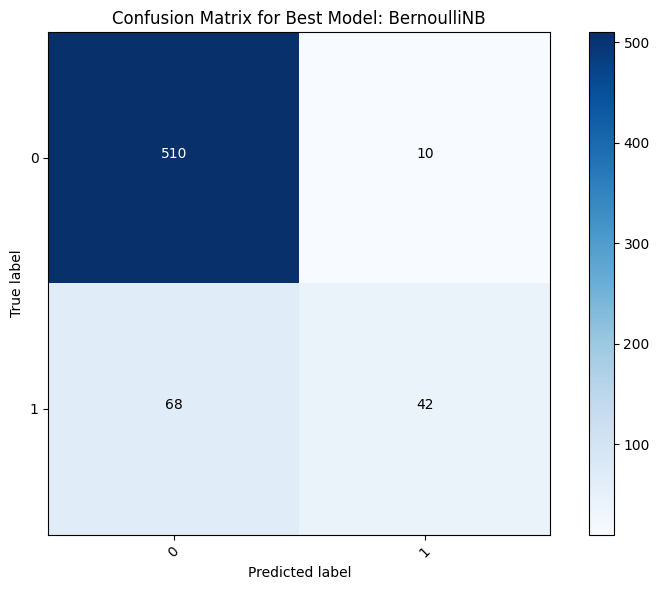


Results saved to Naive_Bayes_Results.xlsx

Summary of Naive Bayes Evaluation:
            Model            Resampling           Transformation  Accuracy  \
35    BernoulliNB         No Resampling       Log Transformation  0.876190   
47    BernoulliNB  Random Undersampling       Log Transformation  0.876190   
43    BernoulliNB   Random Oversampling       Log Transformation  0.876190   
20  MultinomialNB         No Resampling       Log Transformation  0.869841   
0      GaussianNB         No Resampling       Log Transformation  0.828571   
..            ...                   ...                      ...       ...   
7      GaussianNB                 SMOTE           Discretization  0.668254   
6      GaussianNB                 SMOTE  Z-score Standardization  0.665079   
19     GaussianNB              SMOTEENN           Discretization  0.649206   
18     GaussianNB              SMOTEENN  Z-score Standardization  0.642857   
52    BernoulliNB              SMOTEENN      Rank Transformatio

In [12]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import FunctionTransformer, PowerTransformer, StandardScaler, KBinsDiscretizer
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB, ComplementNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN

warnings.filterwarnings("ignore", category=FutureWarning)

dataset = pd.read_csv('Customer_Churn_Modified.csv')

target_variable = dataset.columns[-1]
features = dataset.columns[:-1]

X = dataset[features]
y = dataset[target_variable]

resampling_methods = {
    "No Resampling": None,
    "SMOTE": SMOTE(random_state=42),
    "Random Oversampling": RandomOverSampler(random_state=42),
    "Random Undersampling": RandomUnderSampler(random_state=42),
    "SMOTEENN": SMOTEENN(random_state=42)
}

transformations = {
    "Log Transformation": FunctionTransformer(np.log1p, validate=True),
    "Rank Transformation": FunctionTransformer(
        lambda x: pd.DataFrame(x, columns=X.columns).rank(axis=0).to_numpy(), validate=True
    ),
    "Box-Cox Transformation": PowerTransformer(method='box-cox'),
    "Z-score Standardization": StandardScaler(),
    "Discretization": KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')
}

if (X <= 0).any().any():
    del transformations["Box-Cox Transformation"]

naive_bayes_models = {
    "GaussianNB": GaussianNB(),
    "MultinomialNB": MultinomialNB(),
    "BernoulliNB": BernoulliNB(),
    "ComplementNB": ComplementNB()
}

results = []

def apply_transformation(transformer, X_train, X_test, y_train=None):
    if transformer == "woe":
        bins = sc.woebin(pd.concat([X_train, y_train], axis=1), y=target_variable)
        X_train_transformed = sc.woebin_ply(X_train, bins)
        X_test_transformed = sc.woebin_ply(X_test, bins)
    else:
        transformer.fit(X_train)
        X_train_transformed = transformer.transform(X_train)
        X_test_transformed = transformer.transform(X_test)
    return X_train_transformed, X_test_transformed

for model_name, model in naive_bayes_models.items():
    for resample_name, resampler in resampling_methods.items():
        for transformation_name, transformer in transformations.items():
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

            if resampler:
                X_train_resampled, y_train_resampled = resampler.fit_resample(X_train, y_train)
            else:
                X_train_resampled, y_train_resampled = X_train, y_train

            try:
                X_train_transformed, X_test_transformed = apply_transformation(
                    transformer, X_train_resampled, X_test, y_train_resampled
                )

                if model_name in ["MultinomialNB", "ComplementNB"] and np.any(X_train_transformed < 0):
                    raise ValueError(f"Negative values detected in features for {model_name}. Skipping...")

            except Exception as e:
                print(f"Skipping {transformation_name} for {model_name} with {resample_name} due to: {e}")
                continue

            try:
                model.fit(X_train_transformed, y_train_resampled)
                y_pred = model.predict(X_test_transformed)
                accuracy = accuracy_score(y_test, y_pred)
                precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
                recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
                f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

                cm = confusion_matrix(y_test, y_pred)
                tpr = cm[1, 1] / (cm[1, 1] + cm[1, 0]) if cm.shape == (2, 2) else None
                tnr = cm[0, 0] / (cm[0, 0] + cm[0, 1]) if cm.shape == (2, 2) else None

                results.append({
                    "Model": model_name,
                    "Resampling": resample_name,
                    "Transformation": transformation_name,
                    "Accuracy": accuracy,
                    "Precision": precision,
                    "Recall": recall,
                    "F1 Score": f1,
                    "TPR": tpr,
                    "TNR": tnr,
                    "Confusion Matrix": cm
                })

            except ValueError:
                continue

results_df = pd.DataFrame(results)

best_model = results_df.loc[results_df['Accuracy'].idxmax()]
best_cm = best_model['Confusion Matrix']

plt.figure(figsize=(8, 6))
plt.imshow(best_cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title(f"Confusion Matrix for Best Model: {best_model['Model']}")
plt.colorbar()
tick_marks = np.arange(len(np.unique(y_test)))
plt.xticks(tick_marks, np.unique(y_test), rotation=45)
plt.yticks(tick_marks, np.unique(y_test))
plt.ylabel('True label')
plt.xlabel('Predicted label')
for i, j in np.ndindex(best_cm.shape):
    plt.text(j, i, format(best_cm[i, j], 'd'),
             horizontalalignment="center",
             color="white" if best_cm[i, j] > best_cm.max() / 2 else "black")
plt.tight_layout()
plt.show()

excel_filename = "Naive_Bayes_Results.xlsx"
results_df.to_excel(excel_filename, index=False)
print(f"\nResults saved to {excel_filename}")

print("\nSummary of Naive Bayes Evaluation:")
print(results_df.sort_values(by=["Accuracy"], ascending=False))

print("\nBest Model Evaluation:")
print(best_model)
